In [1]:
# Importing all necessary libraries for work.

from qiskit import *
from qiskit.visualization import plot_histogram

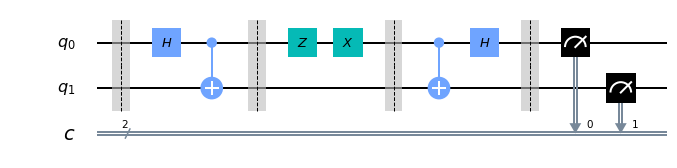

In [2]:
# Create the quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)

qc.barrier()


# First generate the entangled pair between Alice and Bob (Remember: Hadamard followed by CX generates a Bell pair)
# At this point, qubit 1 goes to Bob and qubit 2 goes to Alice
qc.h(0)
qc.cx(0, 1)
qc.barrier()

# Next, Alice encodes her message. First, we need to prepare the state Alice will like to send,
# In this tutorial, Alice is sending 11:

qc.z(0)
qc.x(0)
qc.barrier()

# Alice then sends her qubit to Bob.
# After recieving qubit 0, Bob applies the recovery protocol:
qc.cx(0, 1)
qc.h(0)

# Let's take a measurement to see which classical bit of information Bob receives:
qc.barrier()
qc.measure(0, 0)
qc.measure(1, 1)

# Draw our output
qc.draw(output = "mpl")

{'11': 1024}


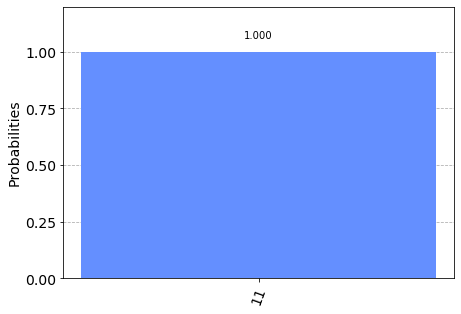

In [3]:
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots=1024)
sim_result = job_sim.result()

measurement_result = sim_result.get_counts(qc)
print(measurement_result)
plot_histogram(measurement_result)

# On a real computer

In [5]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
shots = 256

# Load local account information
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 and not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)
job = execute(qc, backend=backend, shots=shots)

least busy backend:  ibmq_london


In [6]:
# Monitoring our job
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


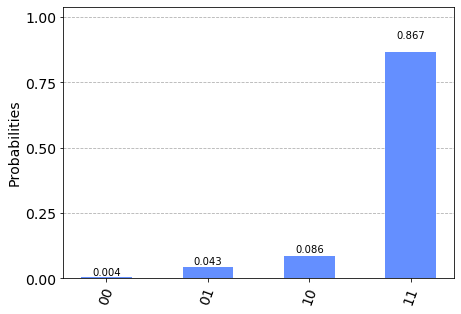

In [7]:
# Plotting our result
result = job.result()
plot_histogram(result.get_counts(qc))

In [8]:
correct_results = result.get_counts(qc)['11']
accuracy = (correct_results/float(shots))*100
print("Accuracy = %.2f%%" % accuracy)

Accuracy = 86.72%
